In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

titanic_df = pd.read_csv('/content/train.csv')

titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna('S', inplace=True)
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

train_df = titanic_df.sample(frac=0.8, random_state=42)
test_df = titanic_df.drop(train_df.index)


X_train = train_df.drop('Survived', axis=1).values
y_train = train_df['Survived'].values
X_test = test_df.drop('Survived', axis=1).values
y_test = test_df['Survived'].values

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[7]),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
45/45 [==============================] - 2s 15ms/step - loss: 2.9558 - accuracy: 0.5302 - val_loss: 0.8020 - val_accuracy: 0.6742
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 2.1855 - accuracy: 0.5638 - val_loss: 0.7293 - val_accuracy: 0.6742
Epoch 3/100
45/45 [==============================] - 0s 3ms/step - loss: 1.3858 - accuracy: 0.6017 - val_loss: 0.6947 - val_accuracy: 0.6854
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 1.2267 - accuracy: 0.6171 - val_loss: 0.6562 - val_accuracy: 0.6798
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 1.1652 - accuracy: 0.5989 - val_loss: 0.6729 - val_accuracy: 0.6910
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 1.0003 - accuracy: 0.6213 - val_loss: 0.6366 - val_accuracy: 0.6629
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.9971 - accuracy: 0.5764 - val_loss: 0.6576 - val_accuracy: 0.6742
Epoch 8/100


In [33]:
loss, acc = model.evaluate(X_test, y_test)
print(loss)
print(acc)

6/6 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7528
0.5126615166664124
0.7528089880943298


In [29]:
example = np.array([[2,0,14.0,1,0,30.0708,1]])
prediction = model.predict(example)
print("prediction :", prediction)

1/1 [==============================] - 0s 69ms/step
prediction : [[0.52432585]]


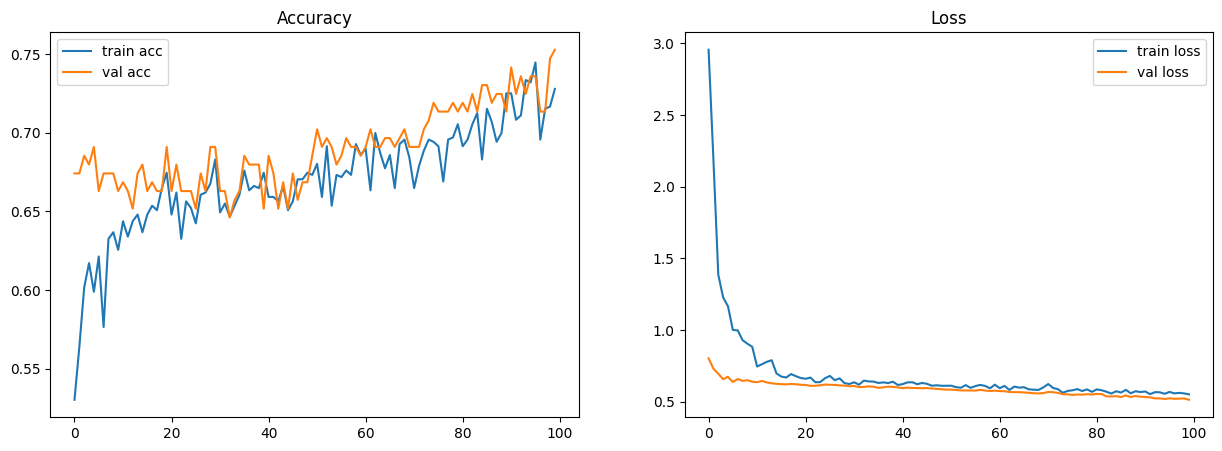

In [34]:
import matplotlib.pyplot as plt

history = history.history
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history["accuracy"],label="train acc")
plt.plot(history["val_accuracy"],label="val acc")
plt.legend()
plt.subplot(122)
plt.title("Loss")
plt.plot(history["loss"],label="train loss")
plt.plot(history["val_loss"],label="val loss")
plt.legend()
plt.show()